<a href="https://colab.research.google.com/github/marcoosnt1/Portifolio_Data_Science/blob/main/Previs%C3%A3o_de_ataque_cardiaco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
df= pd.read_csv('heart.csv')

In [ ]:
df= df.drop(['oldpeak','slp','thall'],axis=1)

## Analise exploratória dos dados 

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


Age: idade do paciente

Sex: Sexo

Exang: Exercise induced angina.

CA: numero de vasos sanguineos maiores.(0-3)

Cp: tipo de dor de cabeça. 
    * Value 0: Angina tipica
    * Value 1: Atipica 
    * Value 2: Dor não anginal
    * value 3: assintomatico.

Trbps: Pressão sanguinea em descanso. 

Chol: colesterol in ma/dl coletado via sensor BMI

fbs:(pressão sanguinea rapida > 120mg/dll)(1=verdadeiro 0=falso)

rest_ecg: resultado do grafico eletro cardiaco em descanso

talach: batimentos cardiacos maximos alcançados.

target: 0= menor chance de ataque cardiaco 1= mais chances de ter ataque cardiaco

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.shape

(303, 11)

In [ ]:
#visualizando grafico de correlação
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<AxesSubplot:>

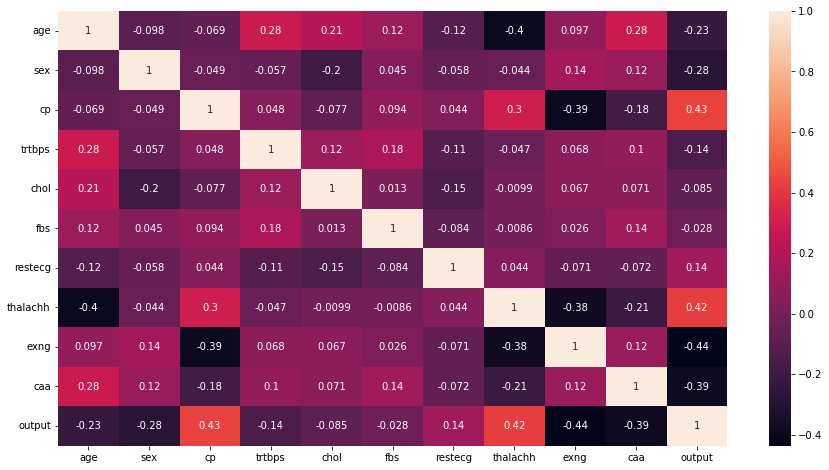

In [ ]:
plt.subplots(figsize=(15, 8))
sns.heatmap(df.corr(),annot=True)

Como visto na visualição dos  heatmap os dados não estão altamente correlacionados uns com ons outros.

<AxesSubplot:title={'center':'Idade dos pacientes'}, xlabel='age', ylabel='count'>

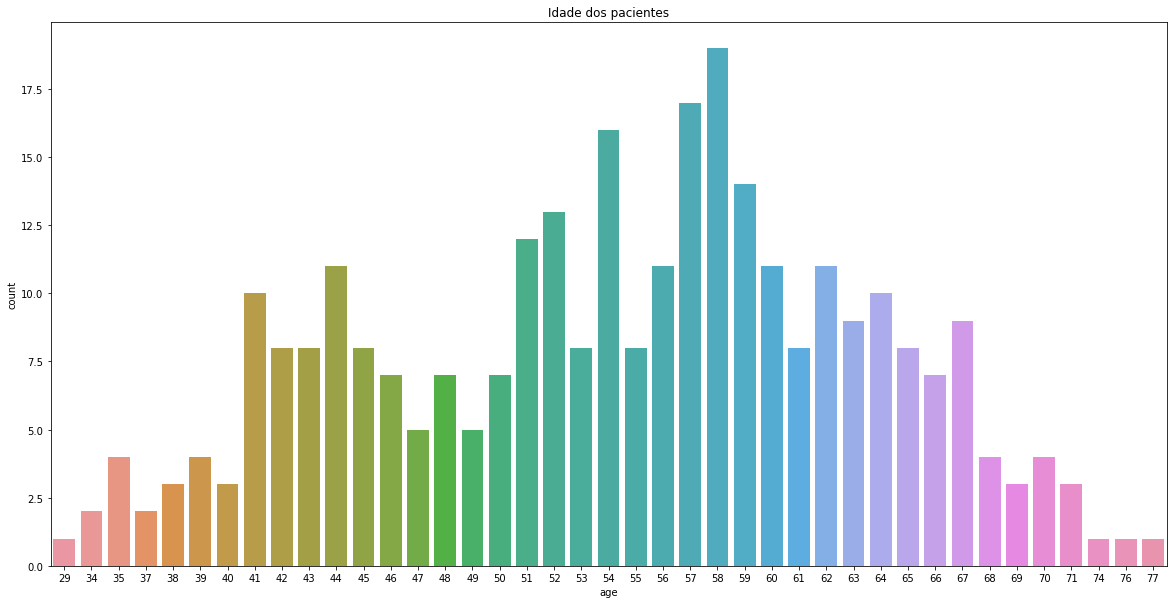

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Idade dos pacientes')
sns.countplot(x='age',data=df)

Após essa analise notamos que a maioria dos nossos pacientes possuem entre 40 e 67 anos. 
Sendo que a idade mais alta é 57 anos, com 17 pessoas.

<AxesSubplot:title={'center':'Sexo dos pacientes, 0= Mulher, 1= Homem'}, xlabel='sex', ylabel='count'>

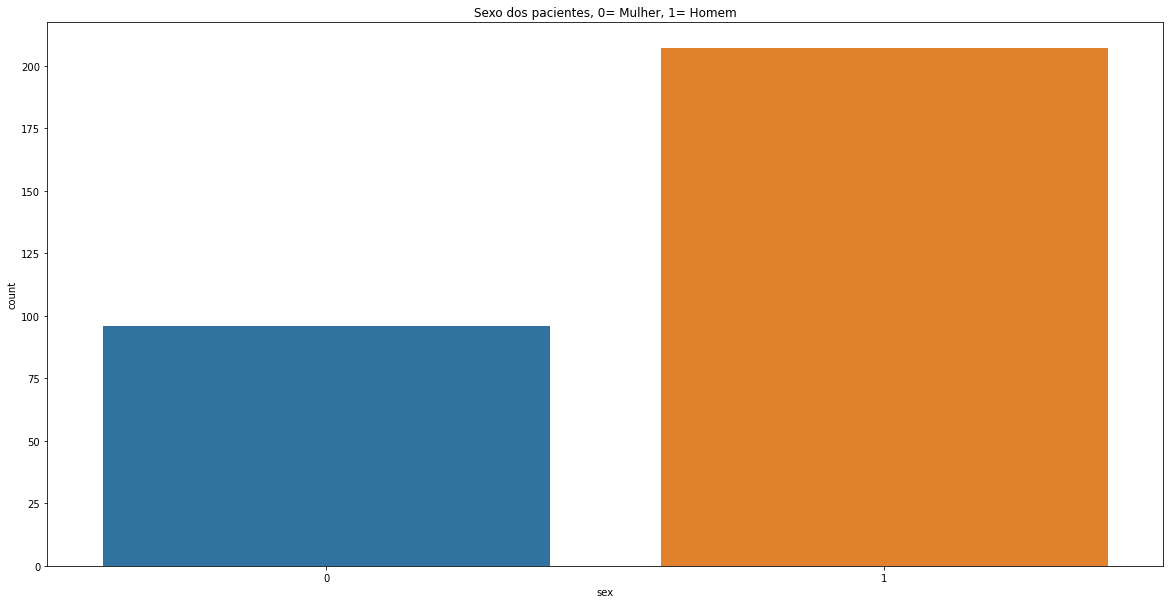

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Sexo dos pacientes, 0= Mulher, 1= Homem')
sns.countplot(x='sex',data=df)

Notamos que a maioria dos pacientes deste dataset é homem(200), sendo apenas 100 mulheres.

In [ ]:
cp_data=df['cp'].value_counts().reset_index()
cp_data['index'][3]='Assintomatico'
cp_data['index'][2]='Não anginal'
cp_data['index'][1]='Angina atipica'
cp_data['index'][0]='Tipica angina'
cp_data

,index,cp
0,Tipica angina,143
1,Angina atipica,87
2,Não anginal,50
3,Assintomatico,23


<AxesSubplot:title={'center':'Distribuição dos tipos de Dor de cabeça por paciente'}, xlabel='index', ylabel='cp'>

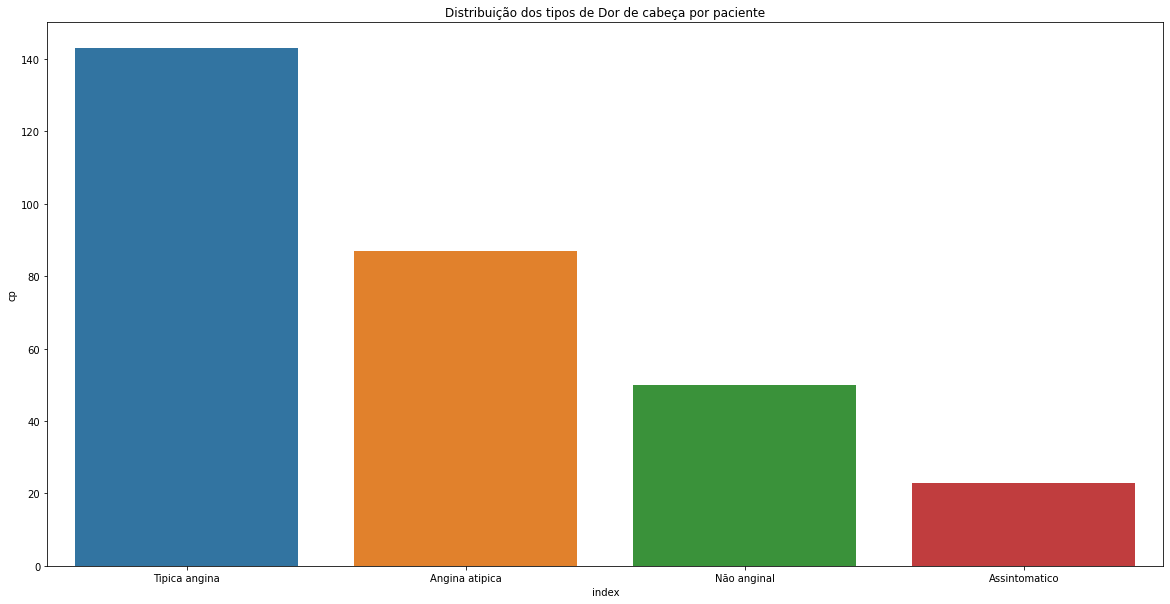

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Distribuição dos tipos de Dor de cabeça por paciente')
sns.barplot(x=cp_data['index'],y=cp_data['cp'])

Agora irei visualizar como a variavel Chest pain category é distribuida.

In [ ]:
ecg_data=df['restecg'].value_counts().reset_index()
ecg_data['index'][0]='normal'
ecg_data['index'][1]='Tem ondas st.t anormais'
ecg_data['index'][2]='Demonstra uma provavel ou definitiva hipertrofia ventricular esquerda'
ecg_data

,index,restecg
0,normal,152
1,Tem ondas st.t anormais,147
2,Demonstra uma provavel ou definitiva hipertrof...,4


<AxesSubplot:title={'center':'Dados ecg dos pacientes:'}, xlabel='index', ylabel='restecg'>

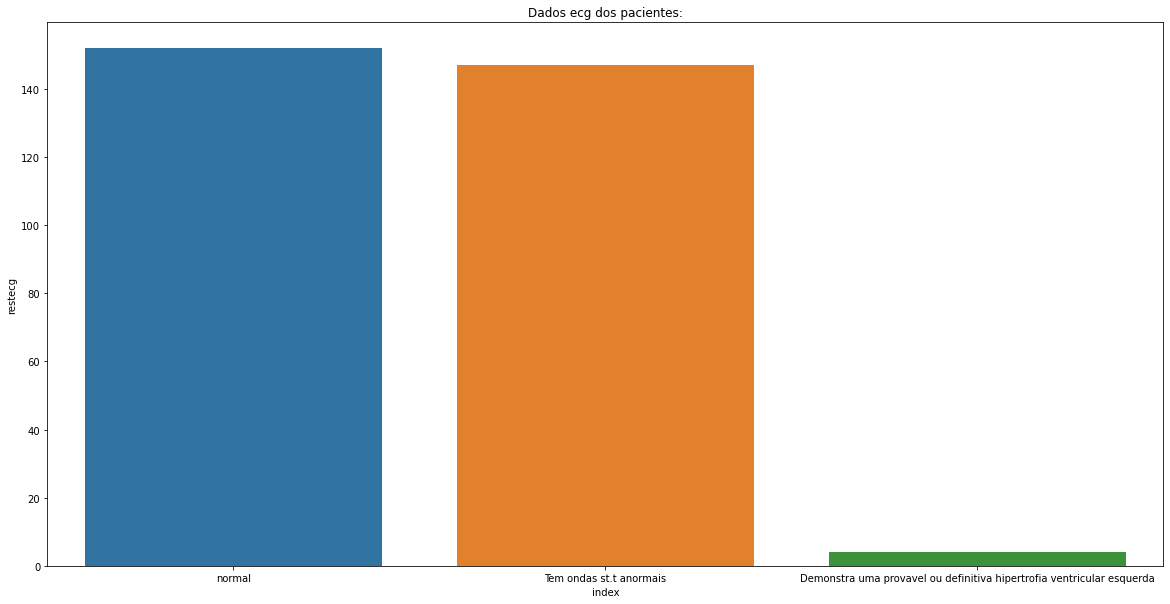

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Dados ecg dos pacientes:')
sns.barplot(x=ecg_data['index'],y=ecg_data['restecg'])

In [ ]:
##sns.pairplot(df,hue='output',data=df) 

C:\Users\marco\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\marco\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Batimentos cardiacos maximos.')

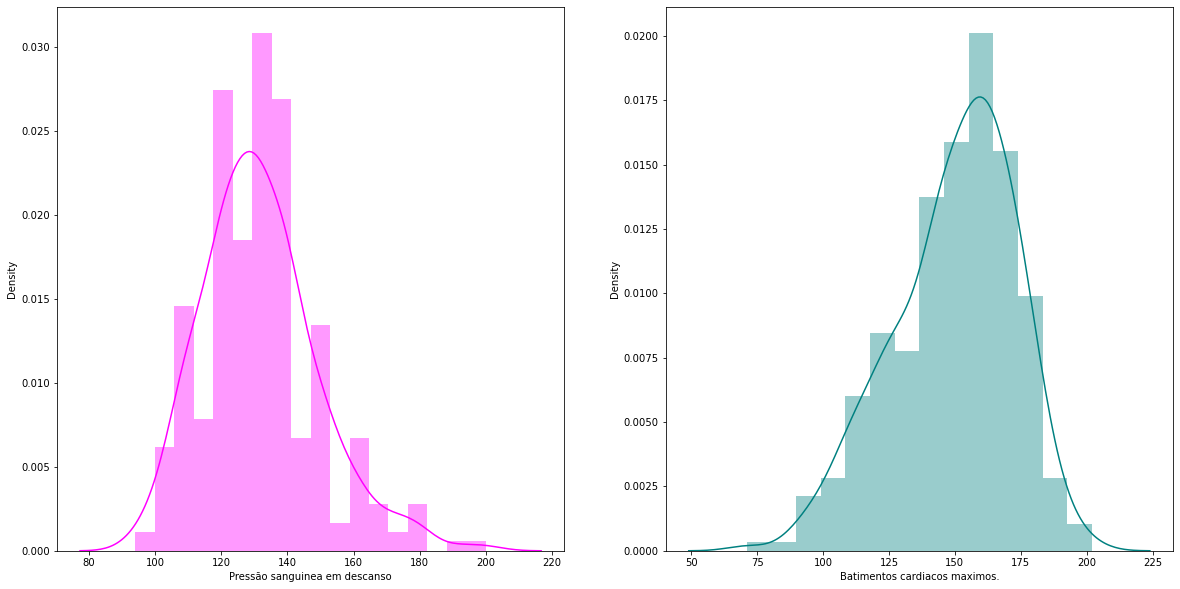

In [ ]:
## distribuição das variaveis continuas
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['trtbps'],kde=True,color='magenta')
plt.xlabel('Pressão sanguinea em descanso')
plt.subplot(1,2,2)
sns.distplot(df['thalachh'],kde=True,color='teal')
plt.xlabel('Batimentos cardiacos maximos.')

Ao verificarmos a distribuição das variaveis trtbps, e thalatchh notamos que ambas possuem distribuição normal dos residuos.

C:\Users\marco\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'colesterol')

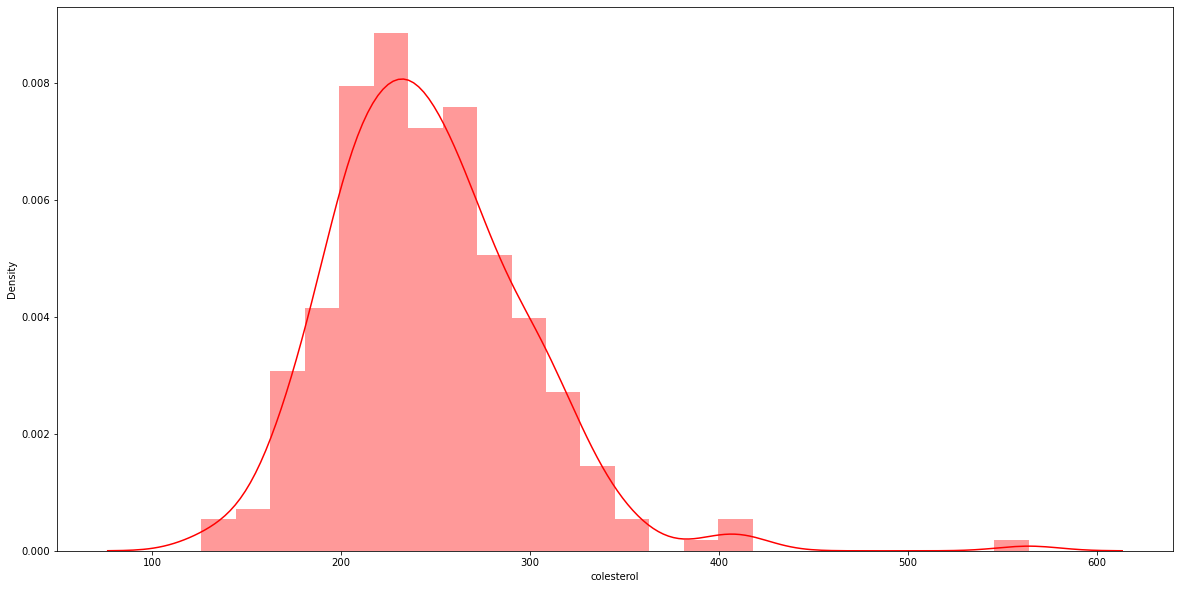

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df['chol'],kde=True,color='Red')
plt.xlabel('colesterol')

Ao checarmos  a normalização da label colesterol, também podemos notar que ela é normalmente distribuida, apesar de alguns residuos existentes.

### Feature Scaling

In [ ]:
#aplicando standardisation
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(df)

StandardScaler()

In [ ]:
df=scaler.transform(df)

In [ ]:
df=pd.DataFrame(df,columns=['age','sex','cp','trtbps','chol','fbs','restecg','thallach','exng','caa','output'])

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thallach,exng,caa,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529


**Separando os dados entre variaveis dependente e independente.**


In [ ]:
x=df.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thallach,exng,caa
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429
...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.714429
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,-0.714429
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,1.244593
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.265082


In [ ]:
y=df.iloc[:,-1:]

In [ ]:
y

,output
0,0.914529
1,0.914529
2,0.914529
3,0.914529
4,0.914529
...,...
298,-1.093459
299,-1.093459
300,-1.093459
301,-1.093459


## Modelagem

**Separando os dados entre treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
## regressão logistica.
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



**Regressão Logistica**

In [ ]:
#aplicando o label encoder 
lbl=LabelEncoder()

In [ ]:
encoder_y=lbl.fit_transform(y_train)

C:\Users\marco\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
logreg=LogisticRegression()

In [ ]:
logreg.fit(X_train,encoder_y)

LogisticRegression()

In [ ]:
encoder_ytest=lbl.fit_transform(y_test)

C:\Users\marco\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
y_pred1=logreg.predict(X_test)
lr_confus_matrix=confusion_matrix(encoder_ytest,y_pred1)
lr_acc_score=accuracy_score(encoder_ytest,y_pred1)

In [ ]:
lr_confus_matrix

array([[35,  9],
       [ 4, 43]], dtype=int64)

In [ ]:
print(lr_acc_score*100,'%')

85.71428571428571 %


Após feita todas os procedimentos, podemos ver que nosso modelo de regressão logistica teve um acerto de 85%

**Arvore de decisão**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree=DecisionTreeClassifier()

In [ ]:
#treinando o modelo
tree.fit(X_train,encoder_y)

DecisionTreeClassifier()

In [ ]:
ypred2=tree.predict(X_test)

In [ ]:
#criando a arvore de decisão e a accuracia 
tree_conf=confusion_matrix(encoder_ytest,ypred2)
tree_acc=accuracy_score(encoder_ytest,ypred2)

In [ ]:
tree_conf

array([[26, 18],
       [ 9, 38]], dtype=int64)

In [ ]:
print(tree_acc*100,'%')

70.32967032967034 %


Ja o modelo DecisionTree performou cerca de 70%

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,encoder_y)

RandomForestClassifier()

In [ ]:
ypred3=rf.predict(X_test)

In [ ]:
rf_conf_matrix=confusion_matrix(encoder_ytest,ypred3)
rf_acc = accuracy_score(encoder_ytest,ypred3)

In [ ]:
rf_conf_matrix

array([[32, 12],
       [ 6, 41]], dtype=int64)

In [ ]:
print(rf_acc*100,'%')

80.21978021978022 %


Ja o modelo random forest acertou cerca de 80%

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate= []
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,encoder_y)
    pred= knn.predict(X_test)
    error_rate.append(np.mean(pred != encoder_ytest))

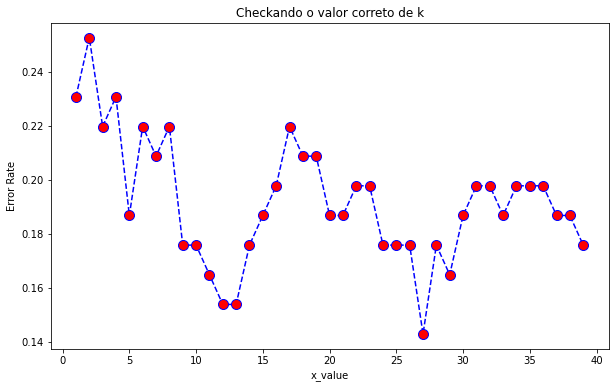

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.xlabel('x_value')
plt.ylabel('Error Rate')
plt.title('Checkando o valor correto de k')
plt.show()

Como podemos notar, temos que selecionar k=12  que ira nos dar  a melhor taxa de erro 

In [ ]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,encoder_y)
ypred4=knn.predict(X_test)

In [ ]:
knn_conf_matrix=confusion_matrix(encoder_ytest,ypred4)
knn_acc_score=accuracy_score(encoder_ytest,ypred4)


In [ ]:
knn_conf_matrix

array([[35,  9],
       [ 5, 42]], dtype=int64)

In [ ]:
print(knn_acc_score*100,'%')

84.61538461538461 %


Como podemos notar o modelo KNN, nos deu uma accuracia de 85% o que é algo bom para nossos parametros.


**SVM**

In [ ]:
from sklearn import svm 

In [ ]:
svm=svm.SVC()

In [ ]:
svm.fit(X_train,encoder_y)

SVC()

In [ ]:
y_pred5= svm.predict(X_test)

In [ ]:
svm_conf_matrix=confusion_matrix(encoder_ytest,y_pred5)
svm_acc_score=accuracy_score(encoder_ytest,y_pred5)

In [ ]:
svm_conf_matrix
print(svm_acc_score*100,'%')

80.21978021978022 %


No modelo SVM ouve uma accuracia de 80%

## Verificando qual modelo obteve a melhor performance entre todos 

In [ ]:
model_acc= pd.DataFrame({'Model' : ['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbor','SVM'],'Accuracy' : [lr_acc_score*100,tree_acc*100,rf_acc*100,knn_acc_score*100,svm_acc_score*100]})

In [ ]:
model_acc = model_acc.sort_values(by=['Accuracy'],ascending=False)

In [ ]:
model_acc

,Model,Accuracy
0,Logistic Regression,85.714286
3,K Nearest Neighbor,84.615385
2,Random Forest,80.219780
4,SVM,80.219780
1,Decision Tree,70.329670


Como podemos verificar a Regressão logisitca foi o modelo que melhor performou dentre todos os modelos, obtendo uma accuracia de 85%
